In [331]:
import pandas as pd
import yfinance as yf
import seaborn as sn
import numpy as np
import datetime as dt
from datareader import data as pdr
import scipy.optimize as sco
import matplotlib.pyplot as plt
import math





In [196]:
stocks =  ['AAPL', 'TSLA', 'MSFT', 'AMZN', 'GOOGL', 'V', 'NVDA'] 
price=yf.download(stocks, period = '2y') ['Adj Close'].pct_change().dropna()
returns = price
data = yf.download(stocks, start="2022-10-26", end="2024-10-26")



{}

df = pd.DataFrame(data)

[*********************100%***********************]  7 of 7 completed
[*********************100%***********************]  7 of 7 completed


In [380]:
class EfficientFrontier:
    def __init__(self, returns, assets):
        self.returns = returns
        self.assets = assets
    
    def Calc(self):
        self.tbl = pd.DataFrame(index=self.assets)
        self.tbl['Mean'] = self.returns.mean()
        self.tbl['Variance'] = self.returns.var()
        return self.tbl.T
    
    def correlation(self):
        self.tbl = pd.DataFrame(index=self.assets)
        self.corr = self.returns.corr()
        return self.corr
    
    def PortfolioReturn(self, weight):
        return np.sum(self.returns.mean() * weight) * 252
    
    def PortfolioVolatility(self, weight):
        return np.sqrt(np.dot(weight.T, np.dot(self.returns.cov() * 252, weight)))

    def maxSR(self, meanReturns, covMatrix, riskFreeRate=0, constraintSet=(0, 1)):
        numAssets = len(meanReturns)
        args = (meanReturns, covMatrix, riskFreeRate)
        constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
        bounds = tuple((constraintSet[0], constraintSet[1]) for asset in range(numAssets))
        result = sco.minimize(self.negative_sharpe_ratio, numAssets * [1. / numAssets,], args=args,
                              method='SLSQP', bounds=bounds, constraints=constraints)
        return result

    def negative_sharpe_ratio(self, weights, meanReturns, covMatrix, riskFreeRate=0):
        pReturns, pStd = self.portfolio_performance(weights, meanReturns, covMatrix)
        return -(pReturns - riskFreeRate) / pStd

    def portfolio_performance(self, weights, meanReturns, covMatrix):
        pReturns = np.sum(weights * meanReturns) * 252
        pStd = np.sqrt(np.dot(weights.T, np.dot(covMatrix, weights))) * np.sqrt(252)
        return pReturns, 

In [ ]:
# Code From https://github.com/CCNY-Analytics-and-Quant/D_Herrera-I_Egonu-L_Carr-QF-2024/blob/main/EfficientFrontier.ipynb

In [ ]:
# Change df index to date

In [338]:
df.head


<bound method NDFrame.head of Price                       Adj Close                                      \
Ticker                           AAPL        AMZN       GOOGL        MSFT   
Date                                                                        
2022-10-26 00:00:00+00:00  147.713379  115.660004   94.695518  227.399765   
2022-10-27 00:00:00+00:00  143.213226  110.959999   91.992210  222.907227   
2022-10-28 00:00:00+00:00  154.033356  103.410004   96.052162  231.872681   
2022-10-31 00:00:00+00:00  151.659637  102.440002   94.276558  228.196045   
2022-11-01 00:00:00+00:00  148.999115   96.790001   90.246536  224.303162   
...                               ...         ...         ...         ...   
2024-10-21 00:00:00+00:00  236.479996  189.070007  164.070007  418.779999   
2024-10-22 00:00:00+00:00  235.860001  189.699997  165.139999  427.510010   
2024-10-23 00:00:00+00:00  230.759995  184.710007  162.779999  424.600006   
2024-10-24 00:00:00+00:00  230.570007  186.380

In [ ]:
# Sources : https://www.youtube.com/watch?v=Usxer0D-WWM&t=186s&ab_channel=JacksonStamper, https://www.youtube.com/watch?v=Isutk-wqJfE&ab_channel=QuantPy

In [ ]:
# Calculating Mean Returns and Variance

In [339]:
returns = data['Adj Close'].pct_change().dropna()
meanReturns= returns.mean() 
variance = returns.var()
covMatrix = returns.cov() * 252
correlation_matrix = returns.corr()




In [ ]:
# Make a Table

In [340]:
stats_table = pd.DataFrame({
    'Mean Return': meanReturns,
    'Variance': variance
})

print(stats_table)

        Mean Return  Variance
Ticker                       
AAPL       0.001013  0.000240
AMZN       0.001179  0.000429
GOOGL      0.001289  0.000359
MSFT       0.001377  0.000233
NVDA       0.005321  0.001103
TSLA       0.001043  0.001379
V          0.000741  0.000120


In [ ]:
# Calculating Efficient Frontier 

In [ ]:
# Sources : https://www.youtube.com/watch?v=Usxer0D-WWM&t=186s&ab_channel=JacksonStamper, https://www.youtube.com/watch?v=Isutk-wqJfE&ab_channel=QuantPy

In [121]:
# Minimizing Risk

In [342]:
def negative(weights, meanReturns, covMatrix, riskFreeRate = 0):
    pReturns, pStd = portfolio_performance(weights, meanReturns, covMatrix)
    returns - (pReturns- riskFreeRate)/pStd

In [343]:
def maxSR(MeanReturns, covMatrix, riskFreeRate = 0, constraintSet=(0,1)):
    "Minimize the negative SR, by altering the weights of the portfolio"
    numAssets = len(meanReturns)
    args = (meanReturns,covMatrix, riskFreeRate)
   
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

In [383]:
ef = EfficientFrontier(returns = returns, assets = stocks)

weightsCol = []
returnCol = []
volatilityCol = []
sharpeRatioCol = []
risk_free_rate = 0.05

for X in range(1000):
    weights = np.random.random(len(stocks))
    weights /= np.sum(weights)
    weightsCol.append(weights)
    port_return = ef.PortfolioReturn(weights)
    port_volatility = ef.PortfolioVolatility(weights)
    returnCol.append(port_return)
    volatilityCol.append(port_volatility)
     
    
R = np.array(returnCol)
V = np.array(volatilityCol)
sharpe_ratio = (port_return - risk_free_rate) / port_volatility
sharpe_ratio = (R - 0.05) / V


print(ef.Calc())
print(ef.correlation())


              AAPL      TSLA      MSFT      AMZN     GOOGL         V      NVDA
Mean      0.001013  0.001043  0.001377  0.001179  0.001289  0.000741  0.005321
Variance  0.000240  0.001379  0.000233  0.000429  0.000359  0.000120  0.001103
Ticker      AAPL      AMZN     GOOGL      MSFT      NVDA      TSLA         V
Ticker                                                                      
AAPL    1.000000  0.439895  0.536959  0.587715  0.423662  0.418400  0.449256
AMZN    0.439895  1.000000  0.599108  0.628356  0.446390  0.349689  0.351277
GOOGL   0.536959  0.599108  1.000000  0.610162  0.419606  0.285220  0.360231
MSFT    0.587715  0.628356  0.610162  1.000000  0.545200  0.309348  0.437883
NVDA    0.423662  0.446390  0.419606  0.545200  1.000000  0.355707  0.307362
TSLA    0.418400  0.349689  0.285220  0.309348  0.355707  1.000000  0.277555
V       0.449256  0.351277  0.360231  0.437883  0.307362  0.277555  1.000000


In [ ]:
# Make another table

In [122]:
stats_table = pd.DataFrame({
    'Return': meanReturns,
    'Variance': variance
})

print(stats_table)

          Return  Variance
Ticker                    
AAPL    0.001013  0.000240
AMZN    0.001179  0.000429
GOOGL   0.001289  0.000359
MSFT    0.001377  0.000233
NVDA    0.005321  0.001103
TSLA    0.001043  0.001379
V       0.000741  0.000120


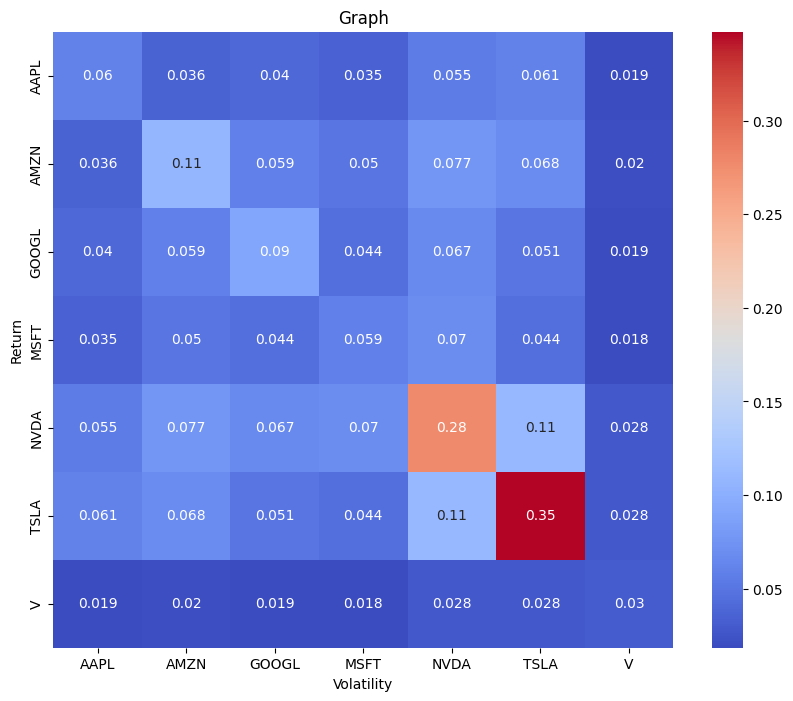

In [389]:
plt.figure(figsize=(10, 8))
sn.heatmap(covMatrix, annot=True, cmap='coolwarm')
plt.title('Graph')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.show()




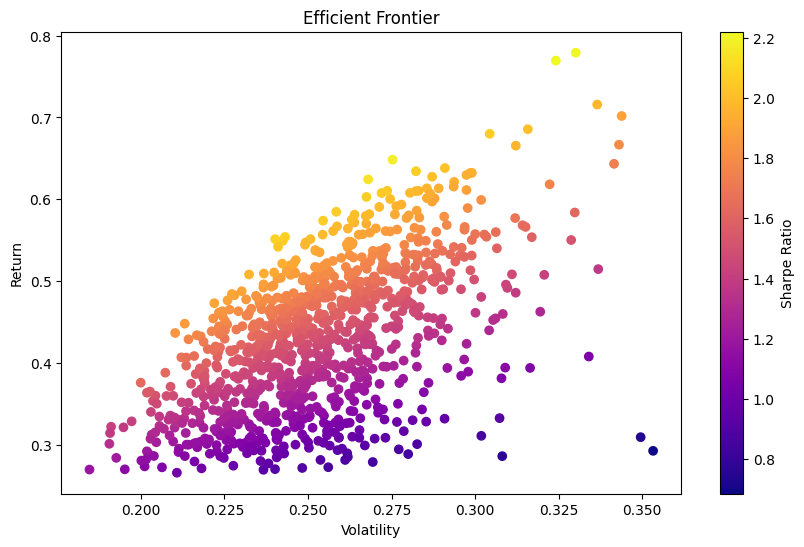

In [390]:
plt.figure(figsize=(10, 6))
plt.scatter(V, R, c=sharpe_ratio, cmap='plasma')
plt.title('Efficient Frontier')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.colorbar(label='Sharpe Ratio')